# New York City Taxi Fare Prediction

## 1 Data Exploration and Analysis


### 1.1 Loading the Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_000)
test_data = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')


### 1.2 Dataset Summary
A concise overview of the dataset's characteristics.

#### 1.2.1 Null values analysis
Counting number of null values in dataframe

In [3]:
# Explore the dataset
print("Shape of training data:", train_data.shape)
print("Shape of test data:", test_data.shape)

print("\nData types of columns:")
print(train_data.dtypes)

print("\nMissing values in training data:")
print(train_data.isnull().sum())

Shape of training data: (10000000, 8)
Shape of test data: (9914, 7)

Data types of columns:
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Missing values in training data:
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64


In [4]:
# Explore the dataset
print("Shape of test data:", test_data.shape)

print("\nData types of test data columns:")
print(test_data.dtypes)

print("\nMissing values in test data:")
print(test_data.isnull().sum())

Shape of test data: (9914, 7)

Data types of test data columns:
key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Missing values in test data:
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


#### 1.2.2 Fare amount analysis
Every fare_amount must be positive, too high values can be outliers

In [5]:
print("\nDescriptive statistics of fare_amount:")
print(train_data['fare_amount'].describe())

print("\nNumber of negative fare_amount rows:")
print(len(train_data[train_data['fare_amount'] <= 0]))


Descriptive statistics of fare_amount:
count    1.000000e+07
mean     1.133854e+01
std      9.799930e+00
min     -1.077500e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

Number of negative fare_amount rows:
689


In [6]:
print("\nMaximum fare_amounts:")
print(train_data.sort_values('fare_amount', ascending=False)['fare_amount'].tolist()[:5])


Maximum fare_amounts:
[1273.31, 952.0, 850.0, 698.16, 542.8299999999999]


#### 1.2.3 Location analysis
Latitude ranges from -90 to +90 degrees (from the South to the North Pole), and longitude ranges from -180 to +180 degrees (west to east from the Prime Meridian).

In [7]:
mask_pickup_longitude = (train_data['pickup_longitude'] >= -180) & (train_data['pickup_longitude'] < 180)
mask_pickup_latitude = (train_data['pickup_latitude'] >= -90) & (train_data['pickup_latitude'] <= 90)
mask_dropoff_longitude = (train_data['dropoff_longitude'] >= -180) & (train_data['dropoff_longitude'] < 180)
mask_dropoff_latitude = (train_data['dropoff_latitude'] >= -90) & (train_data['dropoff_latitude'] <= 90)

print(f"\nNumber of invalid rows by location in train_data: {len(train_data[~(mask_pickup_longitude & mask_pickup_latitude & mask_dropoff_longitude & mask_dropoff_latitude)])}")


Number of invalid rows by location in train_data: 545


In [8]:
mask_pickup_longitude = (test_data['pickup_longitude'] >= -180) & (test_data['pickup_longitude'] < 180)
mask_pickup_latitude = (test_data['pickup_latitude'] >= -90) & (test_data['pickup_latitude'] <= 90)
mask_dropoff_longitude = (test_data['dropoff_longitude'] >= -180) & (test_data['dropoff_longitude'] < 180)
mask_dropoff_latitude = (test_data['dropoff_latitude'] >= -90) & (test_data['dropoff_latitude'] <= 90)

print(f"\nNumber of invalid rows by location in test_data: {len(test_data[~(mask_pickup_longitude & mask_pickup_latitude & mask_dropoff_longitude & mask_dropoff_latitude)])}")


Number of invalid rows by location in test_data: 0


#### 1.2.4 Passenger count analysis
Passenger count must be positive and it can't be too high

In [9]:
print("\nNumber of negative passenger_count rows in train_data:")
print(len(train_data[train_data['passenger_count'] < 0]))
print("\nNumber of zero passenger_count rows in train_data:")
print(len(train_data[train_data['passenger_count'] == 0]))
print("\nMaximum passenger_count in train_data:")
print(train_data.sort_values('passenger_count', ascending=False)['passenger_count'].unique()[:5])


Number of negative passenger_count rows in train_data:
0

Number of zero passenger_count rows in train_data:
35332

Maximum passenger_count in train_data:
[208 129  51  49   9]


In [10]:
print("\nNumber of negative passenger_count rows in test_data:")
print(len(test_data[test_data['passenger_count'] < 0]))
print("\nNumber of zero passenger_count rows in test_data:")
print(len(test_data[test_data['passenger_count'] == 0]))
print("\nMaximum passenger_count in test_data:")
print(test_data.sort_values('passenger_count', ascending=False)['passenger_count'].unique()[:5])


Number of negative passenger_count rows in test_data:
0

Number of zero passenger_count rows in test_data:
0

Maximum passenger_count in test_data:
[6 5 4 3 2]


In [11]:
print("Some rows with passenger_count = 0:")
print(train_data[train_data['passenger_count'] == 0].sample(10))

Some rows with passenger_count = 0:
                                 key  fare_amount          pickup_datetime  \
6543031  2012-04-10 17:47:52.0000004          4.5  2012-04-10 17:47:52 UTC   
5603346  2011-05-19 20:09:21.0000004          5.7  2011-05-19 20:09:21 UTC   
8316490  2011-09-18 06:29:16.0000003          2.5  2011-09-18 06:29:16 UTC   
9904144  2011-03-18 17:44:12.0000002         10.5  2011-03-18 17:44:12 UTC   
5646135  2011-03-26 16:38:23.0000001          6.1  2011-03-26 16:38:23 UTC   
2300495  2012-01-02 08:02:20.0000001          4.5  2012-01-02 08:02:20 UTC   
9327336  2011-08-29 07:56:45.0000001         10.1  2011-08-29 07:56:45 UTC   
9779011  2011-09-11 01:06:47.0000004          8.9  2011-09-11 01:06:47 UTC   
9484562  2012-04-01 02:13:03.0000002          3.3  2012-04-01 02:13:03 UTC   
8388640  2010-11-28 11:16:12.0000001         45.0  2010-11-28 11:16:12 UTC   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
6543031        -73.991242        40.7497

#### 1.2.5 Pickup datetime analysis
Let's see if there are invalid datetime rows 

In [12]:
train_data['pickup_datetime']  = pd.to_datetime(train_data['pickup_datetime'])
train_data['pickup_datetime'].describe()

count                               10000000
mean     2012-03-21 03:19:21.445834752+00:00
min                2009-01-01 00:00:46+00:00
25%                2010-08-20 00:21:14+00:00
50%         2012-03-19 10:19:02.500000+00:00
75%                2013-10-18 17:28:05+00:00
max                2015-06-30 23:59:54+00:00
Name: pickup_datetime, dtype: object

In [13]:
test_data['pickup_datetime']  = pd.to_datetime(test_data['pickup_datetime'])
test_data['pickup_datetime'].describe()

count                                   9914
mean     2012-05-06 09:24:04.549122560+00:00
min                2009-01-01 11:04:24+00:00
25%                2010-11-17 19:10:23+00:00
50%                2012-01-26 07:33:00+00:00
75%                2014-01-11 17:47:47+00:00
max                2015-06-30 20:03:50+00:00
Name: pickup_datetime, dtype: object

## 1.3 Cleaning Data
- Null values are very few, so we can safely delete them.
- Fare amount must be positive number! So we must delete non positive rows. (689 from 10M is too few)
- Invalid locations can also be safely removed and also it will be more deeply analysed in EDA
- Zero passenger count is 35k which is 0.35% of train data. I think it will be still better to just drop them, because its still relatively few.
- Maximum passenger count looks fake, still I'll take a look in EDA for outliers.
- Pickup datetimes are alright

In [14]:
before_len = len(train_data)
train_data = train_data.dropna()
train_data = train_data[train_data['fare_amount'] > 0]

mask_pickup_longitude = (train_data['pickup_longitude'] >= -180) & (train_data['pickup_longitude'] < 180)
mask_pickup_latitude = (train_data['pickup_latitude'] >= -90) & (train_data['pickup_latitude'] <= 90)
mask_dropoff_longitude = (train_data['dropoff_longitude'] >= -180) & (train_data['dropoff_longitude'] < 180)
mask_dropoff_latitude = (train_data['dropoff_latitude'] >= -90) & (train_data['dropoff_latitude'] <= 90)

train_data = train_data[mask_pickup_longitude & mask_pickup_latitude & mask_dropoff_longitude & mask_dropoff_latitude]
train_data = train_data[train_data['passenger_count'] > 0]
print(f"Dropped {before_len - len(train_data)} rows!")

Dropped 36494 rows!


### 1.4 Exploratory Data Analysis
I will use visualizations (such as histograms, scatter plots, and box plots) and statistical methods to examine the distributions of key features, explore relationships between variables, and identify patterns or anomalies.


#### 1.4.1 Analysing Fare Amounts
Creating some plots to detect anomalies like outliers.

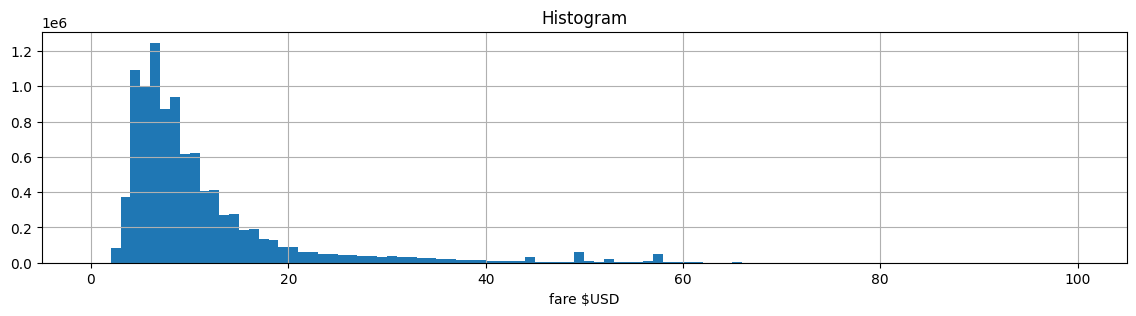

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data[train_data.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

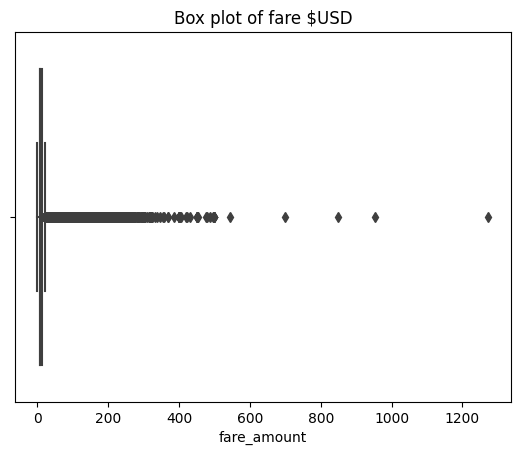

In [16]:
sns.boxplot(x=train_data['fare_amount'])
plt.title('Box plot of fare $USD')
plt.show()

In [17]:
Q1 = train_data['fare_amount'].quantile(0.25)
Q3 = train_data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = 0  # Fares can't be negative
upper_bound = Q3 + 3 * IQR

filtered_data_iqr = train_data[(train_data['fare_amount'] > lower_bound) & (train_data['fare_amount'] <= upper_bound)]
print(f'Rows will be dropped: {len(train_data) - len(filtered_data_iqr)}')
print(f'Max fare_amount will be: {filtered_data_iqr["fare_amount"].max()}')


Rows will be dropped: 441860
Max fare_amount will be: 32.0


In [18]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(train_data['fare_amount'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
filtered_data = train_data[filtered_entries]

print(f"Rows will be dropped {len(train_data) - len(filtered_data)}!")
print(f"Max fare_amount will be {filtered_data['fare_amount'].max()}!")

Rows will be dropped 271339!
Max fare_amount will be 40.77!


In [19]:
domain_upper_bound = 100

filtered_data_combined = train_data[(train_data['fare_amount'] >= 0) & (train_data['fare_amount'] <= domain_upper_bound)]
print(f'Rows will be dropped: {len(train_data) - len(filtered_data_combined)}')
print(f'Max fare_amount will be: {filtered_data_combined["fare_amount"].max()}')


Rows will be dropped: 3844
Max fare_amount will be: 100.0


#### Mini Summary for Fare Amount Analysis (1.4.1)

#### 1.4.1 Fare Amount Analysis
In this chapter, we conducted a thorough examination of the fare amount data to identify and handle outliers, ensuring the dataset's integrity for further analysis.

#### Key Steps and Findings:
1. **Descriptive Statistics**:
   - The fare amounts ranged significantly, with many outliers identified.
   - Basic statistics (mean, median, standard deviation) provided an initial overview.

2. **Visualization**:
   - Histograms and box plots highlighted the distribution and presence of extreme values in the fare amounts.

3. **Outlier Detection and Removal Methods**:
   - **IQR Method**: Applied an adjusted Interquartile Range (IQR) method, setting the upper bound to $( Q3 + 3 \times IQR )$ to account for higher variability.
     - **Outcome**: Rows with fare amounts above \\$32.00 were considered outliers, resulting in the removal of 441,860 rows.
   - **Z-Score Method**: Utilized Z-scores to identify extreme outliers (Z-score > 3).
     - **Outcome**: Rows with fare amounts above \\$40.77 were filtered out, removing 271,339 rows.
   - **Domain Knowledge**: Set a practical upper threshold of \\$100 based on domain knowledge, reflecting realistic fare amounts.
     - **Outcome**: This method was the most conservative, removing only 3844 rows and retaining the majority of the data.

#### Conclusion:
The fare amount analysis offered important insights into the data distribution and addressed extreme outliers. By applying statistical methods and incorporating domain knowledge, the integrity of the dataset was preserved, allowing for more precise distance and feature analyses.
<br>
**No rows were deleted because there is not enough information for looking only this.**

#### 1.4.2 Analysing Distances
Creating some plots to detect anomalies like outliers.

In [21]:
# Firstly converting coordinations into distance!
import numpy as np
def haversine_vectorized(df):
    lat1, lon1, lat2, lon2 = df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude']
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371

    d = c * r
    df['distance'] = d
    return df

In [22]:
train_data = haversine_vectorized(train_data)
train_data['distance'].describe()

count    9.963506e+06
mean     1.954176e+01
std      3.676865e+02
min      0.000000e+00
25%      1.212685e+00
50%      2.116440e+00
75%      3.875325e+00
max      1.285176e+04
Name: distance, dtype: float64

In [23]:
test_data = haversine_vectorized(test_data)
test_data['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

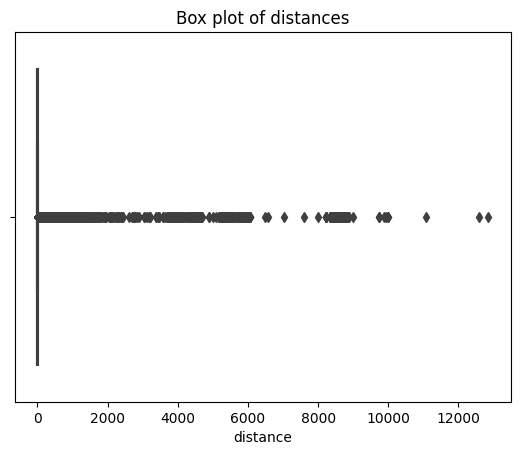

In [24]:
sns.boxplot(x=train_data['distance'])
plt.title('Box plot of distances')
plt.show()

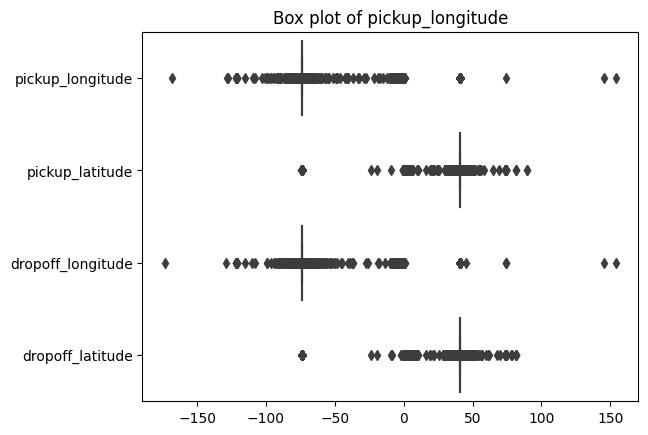

In [25]:
sns.boxplot(data=train_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], orient='h')
plt.title('Box plot of pickup_longitude')
plt.show()

It seems like we have some problematic coordinations with being zero some of them.
- We will have to detect which ones are outliers to handle them. **Important note is that we must predict fare_amount in NEW YORK**

In [26]:
# Counting rows with zero values in key coordinate features
mask = (train_data['pickup_latitude'] == 0.0) | \
    (train_data['pickup_longitude'] == 0.0) | \
    (train_data['dropoff_latitude'] == 0.0) | \
    (train_data['dropoff_longitude'] == 0.0)
zero_coords = train_data[mask]

print(f'Number of rows with zero coordinate values: {zero_coords.shape[0]}')


Number of rows with zero coordinate values: 198697


Latitude	40° 30′ N to 45° 1′ N
<br>
Longitude	71° 51′ W to 79° 46′ W.
<br>
Source: [https://en.wikipedia.org/wiki/New_York_(state)](http://)

In [27]:
# Define coordinate bounds for New York City
ny_lat_min, ny_lat_max = 40.5, 45.0
ny_lon_min, ny_lon_max = -79.75, -71.85

# Filter the training data to remove outliers
filtered_train_data_ny = train_data[
    (train_data['pickup_latitude'].between(ny_lat_min, ny_lat_max)) & 
    (train_data['pickup_longitude'].between(ny_lon_min, ny_lon_max)) & 
    (train_data['dropoff_latitude'].between(ny_lat_min, ny_lat_max)) & 
    (train_data['dropoff_longitude'].between(ny_lon_min, ny_lon_max))
]

# Check the number of rows removed
rows_removed_ny = len(train_data) - len(filtered_train_data_ny)
print(f'Number of rows removed: {rows_removed_ny}')

# Display the count of rows that have zero values in any of the key coordinate features
zero_coords_count_ny = filtered_train_data_ny[
    (filtered_train_data_ny['pickup_latitude'] == 0) |
    (filtered_train_data_ny['pickup_longitude'] == 0) |
    (filtered_train_data_ny['dropoff_latitude'] == 0) |
    (filtered_train_data_ny['dropoff_longitude'] == 0)
].shape[0]

print(f'Number of rows with zero coordinate values: {zero_coords_count_ny}')


Number of rows removed: 209870
Number of rows with zero coordinate values: 0


> As after removing those rows, we will have still a lot data, we can safely delete them

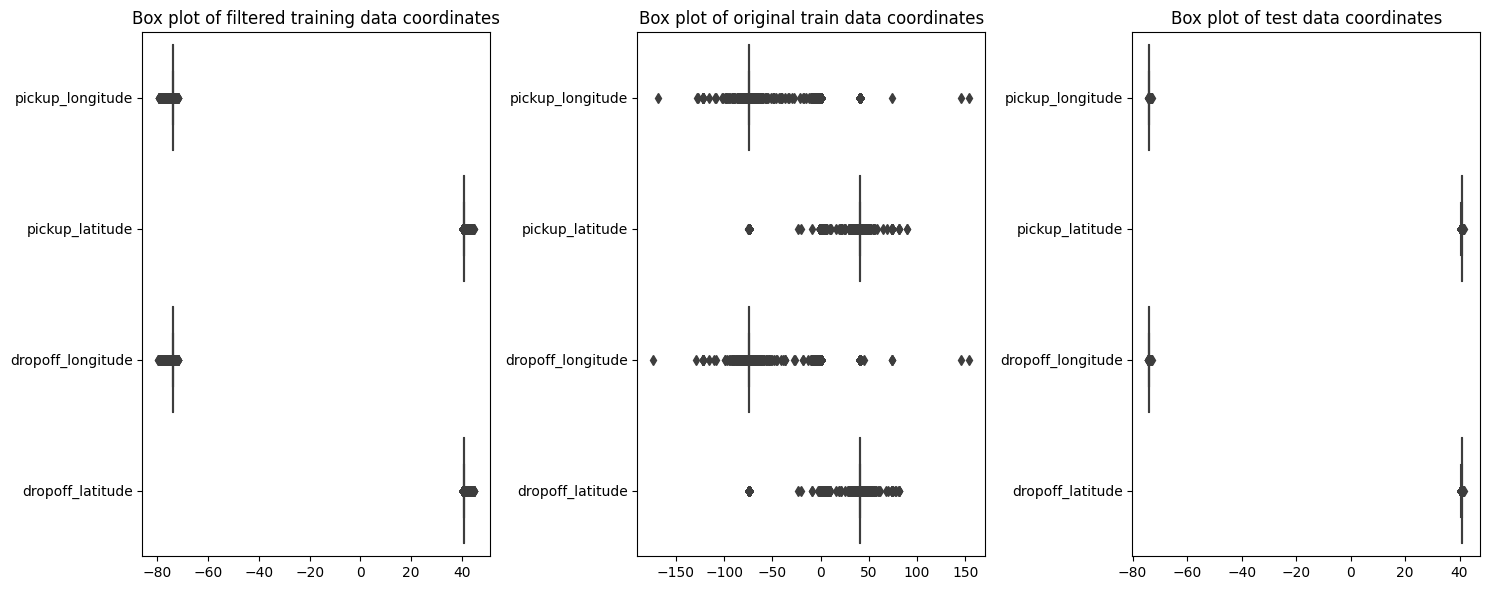

In [28]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Box plot for filtered training data
sns.boxplot(data=filtered_train_data_ny[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], orient='h', ax=axs[0])
axs[0].set_title('Box plot of filtered training data coordinates')

# Box plot for original training data
sns.boxplot(data=train_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], orient='h', ax=axs[1])
axs[1].set_title('Box plot of original train data coordinates')

sns.boxplot(data=test_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], orient='h', ax=axs[2])
axs[2].set_title('Box plot of test data coordinates')
plt.tight_layout()
plt.show()

> It seems that we have clean data in test set. Now train data is pretty cleaned and alike of test set distribution

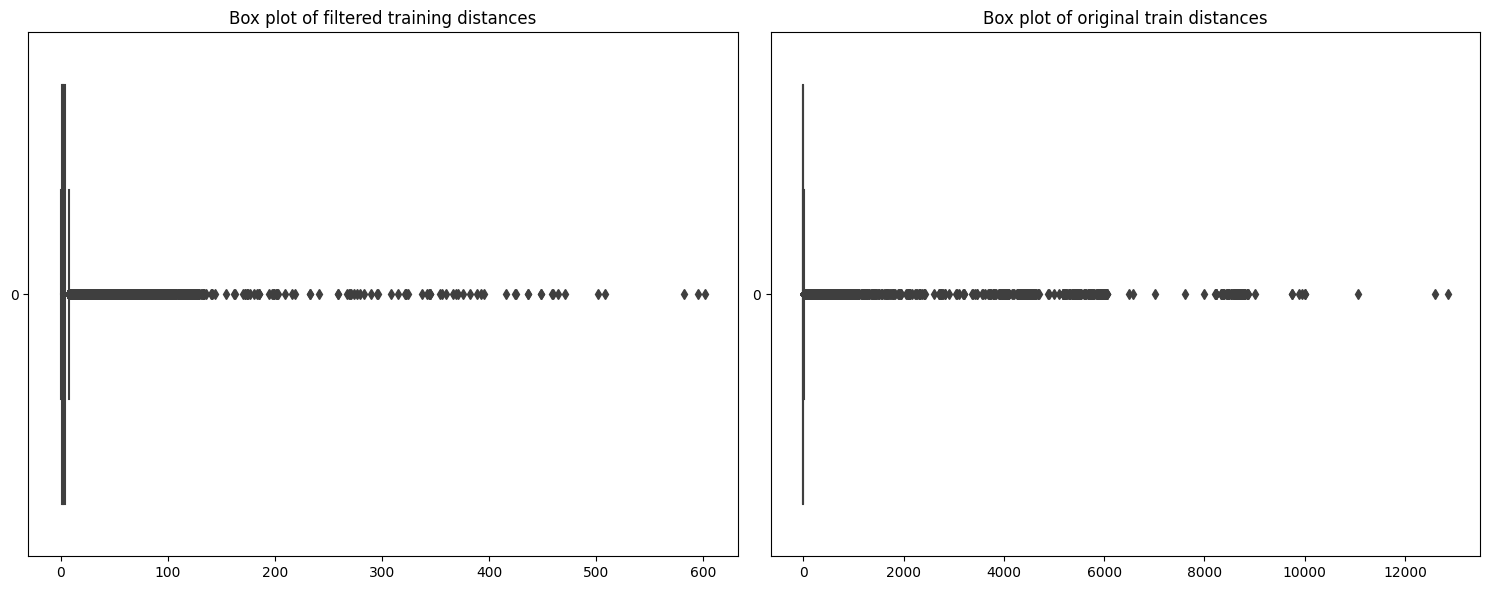

In [29]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))


# Box plot for filtered training data
sns.boxplot(data=filtered_train_data_ny['distance'], orient='h', ax=axs[0])
axs[0].set_title('Box plot of filtered training distances')

# Box plot for original training data
sns.boxplot(data=train_data['distance'], orient='h', ax=axs[1])
axs[1].set_title('Box plot of original train distances')

plt.tight_layout()
plt.show()

> By side effect, too large distances (that can't be right) was removed too which is great!

In [30]:
train_data = filtered_train_data_ny

##### Summary

Firstly, I created a new feature called `distance`, which represents the Haversine distance between the pickup and dropoff points.

Secondly, I removed all data points outside of New York City. This step fixed some outlier problems by eliminating data points with implausibly large distances.

#### 1.4.3 Passenger count analysis
Creating some plots to detect anomalies like outliers.

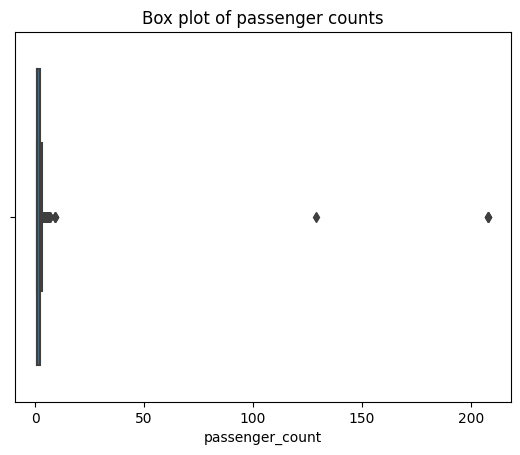

In [31]:
sns.boxplot(x=train_data['passenger_count'])
plt.title('Box plot of passenger counts')
plt.show()

In [32]:
# Assuming 'filtered_train_data_ny' is your dataframe containing the cleaned data
passenger_count_distribution = train_data['passenger_count'].value_counts()

# Print the distribution
print(passenger_count_distribution)

passenger_count
1      6769122
2      1447124
5       691918
3       430239
4       207795
6       207429
9            3
208          3
7            2
129          1
Name: count, dtype: int64


We can safely delete more than 6

In [33]:
train_data = train_data[train_data['passenger_count'] <= 6]

#### 1.4.4 DateTime analysis and feature engineering
Creating new features from datetime objects, analysing them.

In [34]:
!pip install holidays

In [123]:
import holidays
# Ensure the pickup_datetime is in datetime format
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])

# Generate a list of New York public holidays
us_holidays = holidays.US(state='NY')

# Create a new column to mark if the date is a public holiday
train_data['is_public_holiday'] = train_data['pickup_datetime'].dt.date.astype('datetime64[ns]').isin(us_holidays)

# Create the day_of_week, time_of_day, and month_segment features as before
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek + 1

def time_of_day(hour):
    if 0 <= hour < 7:
        return 1  # Midnight
    elif 7 <= hour < 12:
        return 2  # Going to work
    elif 12 <= hour < 16:
        return 3  # Finishing school/unis
    elif 16 <= hour < 18:
        return 4  # Less crowded time
    elif 18 <= hour < 21:
        return 5  # Going home from work
    else:
        return 6  # Going somewhere at night

train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['year'] = train_data['pickup_datetime'].dt.year
train_data['time_of_day'] = train_data['hour'].apply(time_of_day)

# Combine weekends and public holidays to mark rest days
train_data['is_rest_day'] = ((train_data['day_of_week'] >= 6) | train_data['is_public_holiday']).astype(int)

# Create the month_segment feature
train_data['month'] = train_data['pickup_datetime'].dt.month
train_data['day'] = train_data['pickup_datetime'].dt.day
train_data['month_segment'] = (train_data['month'] - 1) * 2 + ((train_data['day'] > 15) + 1)

# Drop the 'hour', 'month' and 'day' columns as they were intermediate steps
train_data = train_data.drop(columns=['hour', 'day', 'month'])

# Display the first few rows to verify the new features
print(train_data[['pickup_datetime', 'day_of_week', 'time_of_day', 'is_rest_day', 'month_segment']].head())

            pickup_datetime  day_of_week  time_of_day  is_rest_day  \
0 2009-06-15 17:26:21+00:00            1            4            0   
1 2010-01-05 16:52:16+00:00            2            4            0   
2 2011-08-18 00:35:00+00:00            4            1            0   
3 2012-04-21 04:30:42+00:00            6            1            1   
4 2010-03-09 07:51:00+00:00            2            2            0   

   month_segment  
0             11  
1              1  
2             16  
3              8  
4              5  


In [124]:
import holidays
# Ensure the pickup_datetime is in datetime format
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

# Generate a list of New York public holidays
us_holidays = holidays.US(state='NY')

# Create a new column to mark if the date is a public holiday
test_data['is_public_holiday'] = test_data['pickup_datetime'].dt.date.astype('datetime64[ns]').isin(us_holidays)

# Create the day_of_week, time_of_day, and month_segment features as before
test_data['day_of_week'] = test_data['pickup_datetime'].dt.dayofweek + 1

def time_of_day(hour):
    if 0 <= hour < 7:
        return 1  # Midnight
    elif 7 <= hour < 12:
        return 2  # Going to work
    elif 12 <= hour < 16:
        return 3  # Finishing school/unis
    elif 16 <= hour < 18:
        return 4  # Less crowded time
    elif 18 <= hour < 21:
        return 5  # Going home from work
    else:
        return 6  # Going somewhere at night

test_data['hour'] = test_data['pickup_datetime'].dt.hour
test_data['year'] = test_data['pickup_datetime'].dt.year
test_data['time_of_day'] = test_data['hour'].apply(time_of_day)

# Combine weekends and public holidays to mark rest days
test_data['is_rest_day'] = ((test_data['day_of_week'] >= 6) | test_data['is_public_holiday']).astype(int)

# Create the month_segment feature
test_data['month'] = test_data['pickup_datetime'].dt.month
test_data['day'] = test_data['pickup_datetime'].dt.day
test_data['month_segment'] = (test_data['month'] - 1) * 2 + ((test_data['day'] > 15) + 1)

# Drop the 'hour', 'month' and 'day' columns as they were intermediate steps
test_data = test_data.drop(columns=['hour', 'day', 'month'])

# Display the first few rows to verify the new features
print(test_data[['pickup_datetime', 'day_of_week', 'time_of_day', 'is_rest_day', 'month_segment']].head())

            pickup_datetime  day_of_week  time_of_day  is_rest_day  \
0 2015-01-27 13:08:24+00:00            2            3            0   
1 2015-01-27 13:08:24+00:00            2            3            0   
2 2011-10-08 11:53:44+00:00            6            2            1   
3 2012-12-01 21:12:12+00:00            6            6            1   
4 2012-12-01 21:12:12+00:00            6            6            1   

   month_segment  
0              2  
1              2  
2             19  
3             23  
4             23  


In [125]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day_of_week,time_of_day,is_rest_day,month_segment,year
count,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06,9.753627e+06
mean,1.132890e+01,-7.397524e+01,4.075110e+01,-7.397436e+01,4.075147e+01,1.690595e+00,3.337560e+00,4.041032e+00,3.424583e+00,2.829488e-01,1.204265e+01,2.011738e+03
std,9.694016e+00,4.115150e-02,3.020083e-02,3.985409e-02,3.351111e-02,1.306267e+00,3.987122e+00,1.949195e+00,1.707046e+00,4.504318e-01,6.883547e+00,1.865720e+00
min,1.000000e-02,-7.958333e+01,4.050004e+01,-7.969389e+01,4.050003e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
25%,6.000000e+00,-7.399229e+01,4.073655e+01,-7.399158e+01,4.073559e+01,1.000000e+00,1.253666e+00,2.000000e+00,2.000000e+00,0.000000e+00,6.000000e+00,2.010000e+03
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075387e+01,1.000000e+00,2.152909e+00,4.000000e+00,3.000000e+00,0.000000e+00,1.200000e+01,2.012000e+03
75%,1.250000e+01,-7.396832e+01,4.076755e+01,-7.396535e+01,4.076840e+01,2.000000e+00,3.910300e+00,6.000000e+00,5.000000e+00,1.000000e+00,1.800000e+01,2.013000e+03
max,9.520000e+02,-7.187649e+01,4.483866e+01,-7.188869e+01,4.489429e+01,6.000000e+00,6.017437e+02,7.000000e+00,6.000000e+00,1.000000e+00,2.400000e+01,2.015000e+03


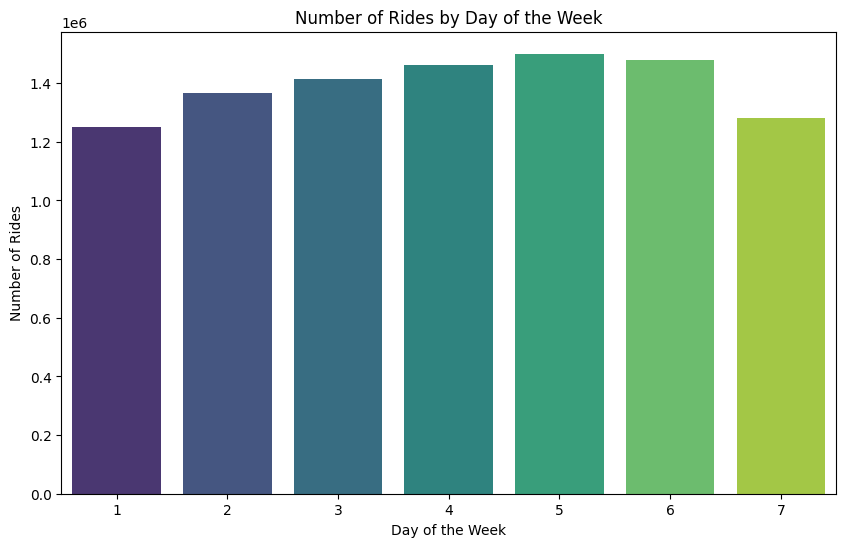

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=train_data, palette='viridis')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()


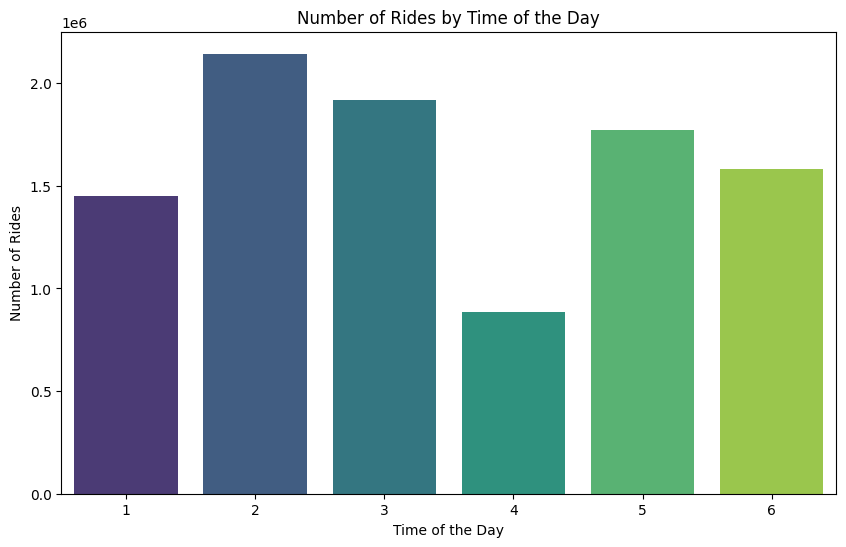

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', data=train_data, palette='viridis')
plt.title('Number of Rides by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Rides')
plt.show()


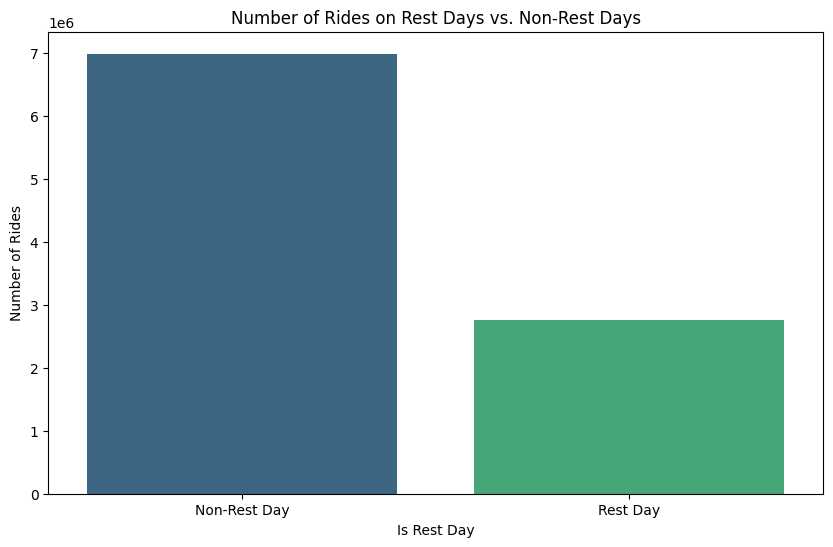

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_rest_day', data=train_data, palette='viridis')
plt.title('Number of Rides on Rest Days vs. Non-Rest Days')
plt.xlabel('Is Rest Day')
plt.ylabel('Number of Rides')
plt.xticks([0, 1], ['Non-Rest Day', 'Rest Day'])
plt.show()


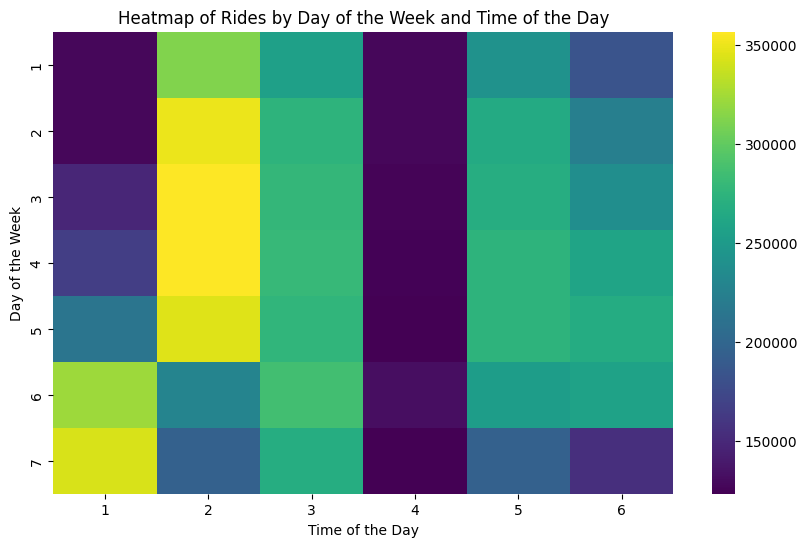

In [129]:
pivot_table = train_data.pivot_table(index='day_of_week', columns='time_of_day', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of Rides by Day of the Week and Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Day of the Week')
plt.show()


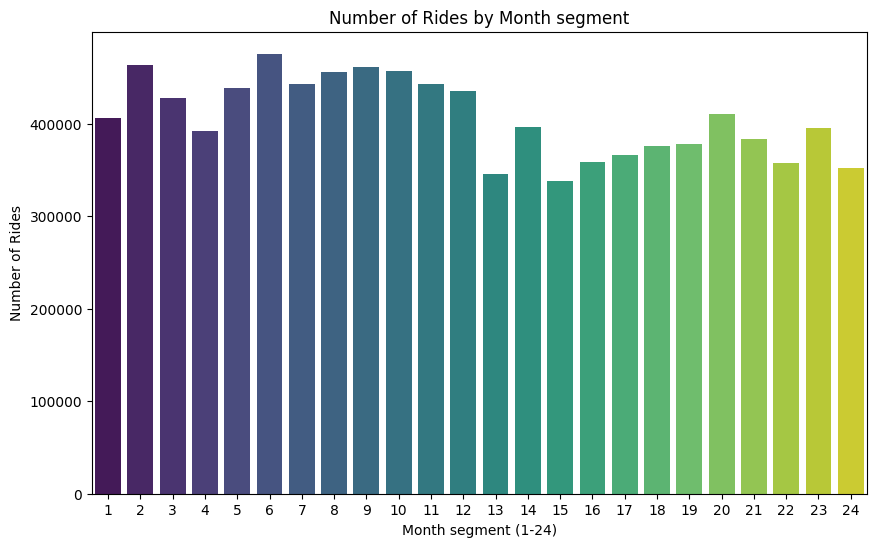

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='month_segment', data=train_data, palette='viridis')
plt.title('Number of Rides by Month segment')
plt.xlabel('Month segment (1-24)')
plt.ylabel('Number of Rides')
plt.show()


Summary of Plots:
1. Number of Rides by Month Segment
Rides are relatively evenly distributed across month segments with some peaks, indicating variations due to factors like holidays or pay periods.
2. Heatmap of Rides by Day of the Week and Time of the Day
Higher ride activity during weekday mornings and evenings, reflecting commute times. Weekends show increased activity in late mornings and evenings.
3. Number of Rides on Rest Days vs. Non-Rest Days
Significantly more rides on non-rest days (weekdays) compared to rest days (weekends and public holidays), aligning with work commute patterns.
4. Number of Rides by Time of the Day
Peak ride counts during morning (time 2) and evening (time 5) commute times, with the lowest activity in the afternoon (time 4).
5. Number of Rides by Day of the Week
Slight increase in rides from Monday to Friday, with fewer rides on Saturday and the lowest on Sunday.

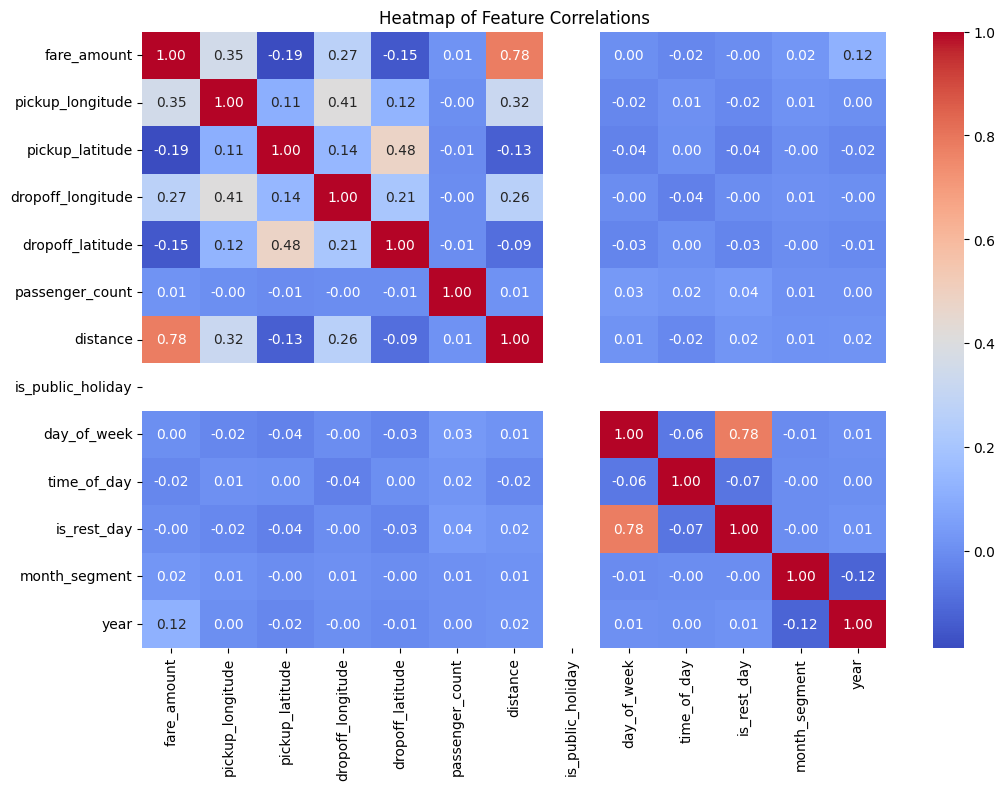

In [132]:

# Calculate the correlation matrix
correlation_matrix = train_data[['fare_amount', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance', 'is_public_holiday', 'day_of_week',
       'time_of_day', 'is_rest_day', 'month_segment', 'year']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

### EDA Summary:

The heatmap of feature correlations provides a comprehensive overview of the relationships between different features in the dataset. Key observations include:

1. **Strong Positive Correlation**:
   - `distance` and `fare_amount` (0.78): As expected, the distance of a trip has a strong positive correlation with the fare amount, indicating that longer trips generally result in higher fares.

2. **Moderate Positive Correlation**:
   - `pickup_longitude` and `fare_amount` (0.35): There is a moderate positive correlation between pickup longitude and fare amount, possibly reflecting distance-related fare increases for certain trip directions.
   - `dropoff_longitude` and `fare_amount` (0.27): Similarly, dropoff longitude shows a moderate positive correlation with fare amount.

3. **Weak or Negligible Correlations**:
   - Most other features, such as `pickup_latitude`, `dropoff_latitude`, `passenger_count`, and temporal features (`day_of_week`, `time_of_day`, `is_rest_day`, `month_segment`), show weak or negligible correlations with `fare_amount` and `distance`.

4. **Insights on Temporal Features**:
   - `day_of_week` and `is_rest_day` (0.78): There is a strong correlation between these two features, as expected, since rest days are typically weekends.
   - `day_of_week`, `time_of_day`, and `is_public_holiday` show very low correlation with `fare_amount`, indicating that fare amounts are relatively consistent across different days and times, excluding the effect of distance.

### Conclusion of EDA:

The exploratory data analysis has provided valuable insights into the key factors influencing taxi fares. The analysis highlighted the strong relationship between trip distance and fare amount while also showing that other factors like location coordinates and temporal features have varying degrees of influence. This comprehensive understanding of the dataset sets a solid foundation for further modeling and predictive analysis.

## 2 Modeling

### 2.1 Linear Regression

In [133]:
valid_sample = train_data.sample(int(len(train_data)*0.2), random_state=42)
valid_keys   = set(valid_sample['key'].tolist())

> It is better to remove higly correlated variables

In [134]:
def highly_correlated(df, threshold):
    # Create a correlation matrix
    correlation_matrix = df[all_features].corr().abs()

    # Select upper triangle of correlation matrix
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than the threshold
    high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    print(f"Highly correlated features (threshold = {threshold}):")
    print(high_correlation_features)
    return set(high_correlation_features)

In [135]:
def get_all_features(df, include_target=False):
    features = list(df.columns)
    features.remove('key')
    features.remove('pickup_datetime')
    if include_target==False:
        features.remove('fare_amount')
    return set(features)

In [136]:
def split_data(df, valid_indexes, x_features, y_feature='fare_amount'):
    if isinstance(x_features, set):
        x_features = list(x_features)
    train = df[~df['key'].isin(valid_indexes)]
    valid = df[df['key'].isin(valid_indexes)]
    X_train = train[x_features]
    y_train = train[y_feature]
    
    X_valid = valid[x_features]
    y_valid = valid[y_feature]
    return X_train, y_train, X_valid, y_valid


In [137]:
# Set a threshold for high correlation
threshold = 0.7

features_to_remove = highly_correlated(train_data, threshold)
features_to_keep = get_all_features(train_data) - features_to_remove

X_train, y_train, X_valid, y_valid = split_data(train_data, valid_keys, features_to_keep)

Highly correlated features (threshold = 0.7):
['is_rest_day']


In [141]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def linear_regression(X_train, y_train, X_valid, y_valid, standard_scaling=False, ridge=False, alpha=1.0):
    if standard_scaling:
        # Preprocessing pipelines for numerical data
        numerical_transformer = StandardScaler()
        numerical_features = list(X_train.columns)
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features)
            ])
        
        if ridge:
            # Creating the Ridge regression pipeline with standard scaling
            linear_model = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', Ridge(alpha=alpha))
            ])
        else:
            # Creating the linear regression pipeline with standard scaling
            linear_model = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('regressor', LinearRegression())
            ])
    else:
        if ridge:
            # Creating the Ridge regression pipeline without standard scaling
            linear_model = Pipeline(steps=[
                ('regressor', Ridge(alpha=alpha))
            ])
        else:
            # Creating the linear regression pipeline without standard scaling
            linear_model = Pipeline(steps=[
                ('regressor', LinearRegression())
            ])
    
    linear_model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = linear_model.predict(X_valid)
    
    # Evaluate the model
    mse = mean_squared_error(y_valid, y_pred)
    r2 = linear_model.score(X_valid, y_valid)
    rmse = np.sqrt(mse)
    
    return mse, r2, rmse, linear_model

In [145]:
mse, r2, rmse, model = linear_regression(X_train, y_train, X_valid, y_valid)
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'RMSE: {rmse}')

MSE: 33.11565859945951
R^2: 0.6482477101174544
RMSE: 5.754620630368218


* Now let's try with Ridge regularization

In [146]:
mse, r2, rmse, model = linear_regression(X_train, y_train, X_valid, y_valid, ridge=True)
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'RMSE: {rmse}')

MSE: 33.11546888231062
R^2: 0.6482497252802014
RMSE: 5.754604146447488


* Now let's try with Ridge regularization with std scaling

In [147]:
mse, r2, rmse, model = linear_regression(X_train, y_train, X_valid, y_valid, ridge=True, standard_scaling=True)
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'RMSE: {rmse}')

MSE: 33.11565868678644
R^2: 0.6482477091898737
RMSE: 5.754620637955767


* I will also try to remove longitude/latitude to see if it will help!

In [148]:
# Set a threshold for high correlation
threshold = 0.7

features_to_remove = highly_correlated(train_data, threshold)
features_to_keep = get_all_features(train_data) - features_to_remove
features_to_keep = {i for i in features_to_keep if 'longitude' not in i and 'latitude' not in i}
print(features_to_keep)
X_train, y_train, X_valid, y_valid = split_data(train_data, valid_keys, features_to_keep)

Highly correlated features (threshold = 0.7):
['is_rest_day']
{'month_segment', 'is_public_holiday', 'day_of_week', 'time_of_day', 'distance', 'year', 'passenger_count'}


In [149]:
mse, r2, rmse, model = linear_regression(X_train, y_train, X_valid, y_valid)
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'RMSE: {rmse}')

MSE: 35.5010166041454
R^2: 0.6229105984360453
RMSE: 5.958272954820499


> The results are not quite good. Ridge regularization isn't doing a thing (which was likely due to the amount of data we have). I think linear regression won't be able to handle it correctly.

### 2.2 Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rf(X_train, y_train, X_valid, y_valid, n_estimators=5, max_depth=5, standard_scaling=False):
    if standard_scaling:
        # Preprocessing pipelines for numerical data
        numerical_transformer = StandardScaler()
        numerical_features = list(X_train.columns)
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features)
            ])

        rf_model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42, verbose=3))
        ])
    else:
        rf_model = Pipeline(steps=[
            ('regressor', RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42, verbose=3))
        ])
    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on validation set
    y_pred_rf = rf_model.predict(X_valid)

    # Evaluate the model
    mse_rf = mean_squared_error(y_valid, y_pred_rf)
    r2_rf = rf_model.score(X_valid, y_valid)
    rmse_rf = np.sqrt(mse_rf)
    return mse, r2_rf, rmse_rf, rf_model


In [152]:
features_to_keep = get_all_features(train_data)

X_train, y_train, X_valid, y_valid = split_data(train_data, valid_keys, features_to_keep)

In [153]:
mse_rf, r2_rf, rmse_rf, model = rf(X_train, y_train, X_valid, y_valid)
print(f'RF MSE: {mse_rf}')
print(f'RF R^2: {r2_rf}')
print(f'RF RMSE: {rmse_rf}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.7s remaining:   55.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s


RF MSE: 35.5010166041454
RF R^2: 0.7817213667861738
RF RMSE: 4.5331891905345065


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


* Let's try with standard scaling

In [154]:
mse_rf, r2_rf, rmse_rf, model = rf(X_train, y_train, X_valid, y_valid, standard_scaling=True)
print(f'RF MSE: {mse_rf}')
print(f'RF R^2: {r2_rf}')
print(f'RF RMSE: {rmse_rf}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 5building tree 2 of 5

building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.2s remaining:   58.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


RF MSE: 35.5010166041454
RF R^2: 0.781721338204764
RF RMSE: 4.53318948732245


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


* Let's increase depth and make it 20

In [155]:
mse_rf, r2_rf, rmse_rf, model = rf(X_train, y_train, X_valid, y_valid, max_depth=20)
print(f'RF MSE: {mse_rf}')
print(f'RF R^2: {r2_rf}')
print(f'RF RMSE: {rmse_rf}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 5building tree 2 of 5

building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


RF MSE: 35.5010166041454
RF R^2: 0.8404319468852554
RF RMSE: 3.8758878738145737


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.1s finished


* Wow, Let's increase it with 10 and make 30

In [156]:
mse_rf, r2_rf, rmse_rf, model = rf(X_train, y_train, X_valid, y_valid, max_depth=30)
print(f'RF MSE: {mse_rf}')
print(f'RF R^2: {r2_rf}')
print(f'RF RMSE: {rmse_rf}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.0s remaining:    2.9s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s


RF MSE: 35.5010166041454
RF R^2: 0.8287747542873161
RF RMSE: 4.014968392758758


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s finished


* Okay nvm, lets try 15

In [158]:
mse_rf, r2_rf, rmse_rf, model = rf(X_train, y_train, X_valid, y_valid, max_depth=15)
print(f'RF MSE: {mse_rf}')
print(f'RF R^2: {r2_rf}')
print(f'RF RMSE: {rmse_rf}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s


RF MSE: 35.5010166041454
RF R^2: 0.8397575207562546
RF RMSE: 3.88407010001816


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.6s finished


* And now lets try with 20 estimators

In [159]:
mse_rf, r2_rf, rmse_rf, model = rf(X_train, y_train, X_valid, y_valid, n_estimators=20, max_depth=20)
print(f'RF MSE: {mse_rf}')
print(f'RF R^2: {r2_rf}')
print(f'RF RMSE: {rmse_rf}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


RF MSE: 35.5010166041454
RF R^2: 0.8497759286548249
RF RMSE: 3.7606939864824196


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.4s finished


> For now it seems that tuning hyperparameters was the solution for RFs<br>
Now I will run on test set (cause it need some time to train and I don't want to run it again d)

In [163]:
X_test = test_data[list(features_to_keep)]
y_pred_rf = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [164]:
submission_1 = test_data[['key']]
submission_1['fare_amount'] = y_pred_rf
submission_1.to_csv('submission_1.csv', index=False)

/tmp/ipykernel_35/4123228596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_1['fare_amount'] = y_pred_rf


> **LETSGOOOOO I've got 3.19**

### 2.3 XGBoosts

In [170]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def xgboosting(X_train, y_train, X_valid, y_valid, params, num_boost_round=100, early_stopping_rounds=10):
    # Convert data into DMatrix format
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)

    # Train the model
    
    xgb_model = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=[(dvalid, 'validation')],
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=10)

    # Predict on validation set
    y_pred_xgb = xgb_model.predict(dvalid)

    # Evaluate the model
    mse_xgb = mean_squared_error(y_valid, y_pred_xgb)
    r2_xgb = r2_score(y_valid, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    return mse_xgb, r2_xgb, rmse_xgb, xgb_model

In [169]:
params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': 10,
        'learning_rate': 0.1,
        'subsample': 0.8,
    }
mse_xgb, r2_xgb, rmse_xgb, xgb_model = xgboosting(X_train, y_train, X_valid, y_valid, params)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R^2: {r2_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')

[0]	validation-rmse:8.91545
[10]	validation-rmse:4.89480
[20]	validation-rmse:4.07358
[30]	validation-rmse:3.90877
[40]	validation-rmse:3.84723
[50]	validation-rmse:3.81375
[60]	validation-rmse:3.79018
[70]	validation-rmse:3.77557
[80]	validation-rmse:3.76566
[90]	validation-rmse:3.75507
[99]	validation-rmse:3.74739
XGBoost MSE: 14.042913982650447
XGBoost R^2: 0.8508371157654846
XGBoost RMSE: 3.747387621083579


Lets try with smaller lr with 200 round

In [171]:
params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': 10,
        'learning_rate': 0.05,
        'subsample': 0.8,
    }
mse_xgb, r2_xgb, rmse_xgb, xgb_model = xgboosting(X_train, y_train, X_valid, y_valid, params, num_boost_round=200)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R^2: {r2_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')

[0]	validation-rmse:9.30711
[10]	validation-rmse:6.45981
[20]	validation-rmse:5.03434
[30]	validation-rmse:4.38642
[40]	validation-rmse:4.10445
[50]	validation-rmse:3.97911
[60]	validation-rmse:3.91382
[70]	validation-rmse:3.87570
[80]	validation-rmse:3.85115
[90]	validation-rmse:3.83037
[100]	validation-rmse:3.81586
[110]	validation-rmse:3.80278
[120]	validation-rmse:3.78778
[130]	validation-rmse:3.77982
[140]	validation-rmse:3.77171
[150]	validation-rmse:3.76483
[160]	validation-rmse:3.75905
[170]	validation-rmse:3.75124
[180]	validation-rmse:3.74758
[190]	validation-rmse:3.74222
[199]	validation-rmse:3.74012
XGBoost MSE: 13.988481082709784
XGBoost R^2: 0.8514152983536875
XGBoost RMSE: 3.740117789951245


Increase max_depth to 15 so maybe it can learn more complex relations.

In [172]:
params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': 15,
        'learning_rate': 0.05,
        'subsample': 0.8,
    }
mse_xgb, r2_xgb, rmse_xgb, xgb_model = xgboosting(X_train, y_train, X_valid, y_valid, params, num_boost_round=200)
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R^2: {r2_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')

[0]	validation-rmse:9.30179
[10]	validation-rmse:6.40366
[20]	validation-rmse:4.94358
[30]	validation-rmse:4.27816
[40]	validation-rmse:3.99677
[50]	validation-rmse:3.87960
[60]	validation-rmse:3.82737
[70]	validation-rmse:3.80081
[80]	validation-rmse:3.78575
[90]	validation-rmse:3.77561
[100]	validation-rmse:3.76798
[110]	validation-rmse:3.76067
[120]	validation-rmse:3.75477
[130]	validation-rmse:3.75037
[140]	validation-rmse:3.74656
[150]	validation-rmse:3.74457
[160]	validation-rmse:3.74280
[170]	validation-rmse:3.74173
[180]	validation-rmse:3.74125
[190]	validation-rmse:3.74096
[199]	validation-rmse:3.74089
XGBoost MSE: 13.99426837534567
XGBoost R^2: 0.8513538261220306
XGBoost RMSE: 3.7408913878039374


> Seems like it converges to 3.74 and tuning parameters won't change a thing too much.

In [174]:
X_test = test_data[list(features_to_keep)]
dtest = xgb.DMatrix(X_test)
y_pred_xgb = xgb_model.predict(dtest)

In [175]:
submission_2 = test_data[['key']]
submission_2['fare_amount'] = y_pred_xgb
submission_2.to_csv('submission_2.csv', index=False)

/tmp/ipykernel_35/717142722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_2['fare_amount'] = y_pred_xgb


* Reduced rmse on test to 3.17

### 2.4 ANN and Transformers

In [185]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, Input, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



def ann(X_train, y_train, X_valid, y_valid, num_states, dropout=0.2, lr=0.001, epochs=50, batch_size=256):
    # Create a simple model containing the len(num_states) layer with num_states[i] perceptrons.
    inp = Input(shape=(X_train.shape[1], 1))
    x = inp
    for i in num_states:
        x = Dense(i, activation="silu")(x)
        x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inp, outputs=outputs)
    
    print(model.summary())
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        
    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping], verbose=1)
    

    # Predict on validation set
    y_pred = model.predict(X_valid)

    # Evaluate the model
    mse = mean_squared_error(y_valid, y_pred_rf)
    r2 = model.score(X_valid, y_valid)
    rmse = np.sqrt(mse_rf)
    return mse, r2, rmse, model, history

In [181]:
features_to_keep = get_all_features(train_data)

X_train, y_train, X_valid, y_valid = split_data(train_data, valid_keys, features_to_keep)

In [183]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [188]:
hidden_states = [64, 32]
mse, r2, rmse, model, history = ann(X_train, y_train, X_valid, y_valid, hidden_states, batch_size=768)

print(f'ANN MSE: {mse}')
print(f'ANN R^2: {r2}')
print(f'ANN RMSE: {rmse}')

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 12, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 12, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 12, 1)          │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
10161/10161 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 95.9442 - root_mean_squared_error: 9.7721 - val_loss: 87.2513 - val_root_mean_squared_error: 9.3408
Epoch 2/50
10161/10161 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 87.2756 - root_mean_squared_error: 9.3421 - val_loss: 85.7606 - val_root_mean_squared_error: 9.2607
Epoch 3/50
10161/10161 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 86.2937 - root_mean_squared_error: 9.2894 - val_loss: 85.6067 - val_root_mean_squared_error: 9.2524
Epoch 4/50
10161/10161 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 85.9469 - root_mean_squared_error: 9.2707 - val_loss: 85.6193 - val_root_mean_squared_error: 9.2531
Epoch 5/50
10161/10161 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 86.4000 - root_mean_squared_error: 9.2951 - val_loss: 85.7482 - val_root_mean_squared_error: 9.2600
Epoch 6/50
 3185/10161 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 85.9327 - root_mean_squared_error: 9.2700

KeyboardInterrupt: 

> Well its not learning anything good

* Lets try attention

In [189]:
%%capture
!pip install --upgrade keras-nlp

In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, Input, Layer, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras_nlp.layers import TransformerEncoder


def transformer_ann(X_train, y_train, X_valid, y_valid, intermediate_dim=256, num_heads=8, f_dim=64, dropout=0.2, lr=0.001, epochs=10, batch_size=256):
    # Create a simple model containing the len(num_states) layer with num_states[i] perceptrons.
    encoder = TransformerEncoder(intermediate_dim=intermediate_dim, num_heads=num_heads)

    # Create a simple model containing the encoder.
    inputs = Input(shape=(X_train.shape[1], 1))
    x = Dense(f_dim, activation="relu")(inputs)
    x = Dropout(dropout)(x)
    x = encoder(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(f_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    
    print(model.summary())
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        
    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping], verbose=1)

    return model, history

In [211]:
model, history = transformer_ann(X_train, y_train, X_valid, y_valid, f_dim=512, intermediate_dim=1024, dropout=0.2, num_heads=8, epochs=5, batch_size=128)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 12, 512)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 12, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_13          │ (None, 12, 512)        │     2,102,784 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_13     │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,366,977 (9.03 MB)

 Trainable params: 2,366,977 (9.03 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
   25/60961 ━━━━━━━━━━━━━━━━━━━━ 6:44 7ms/step - loss: 124.7685 - root_mean_squared_error: 11.1479 

W0000 00:00:1716590213.419612     947 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


60961/60961 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.5936 - root_mean_squared_error: 6.6711

W0000 00:00:1716590613.884876     946 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


60961/60961 ━━━━━━━━━━━━━━━━━━━━ 449s 7ms/step - loss: 44.5935 - root_mean_squared_error: 6.6711 - val_loss: 37.5244 - val_root_mean_squared_error: 6.1257
Epoch 2/5
60961/60961 ━━━━━━━━━━━━━━━━━━━━ 431s 7ms/step - loss: 36.9541 - root_mean_squared_error: 6.0789 - val_loss: 35.7277 - val_root_mean_squared_error: 5.9773
Epoch 3/5
60961/60961 ━━━━━━━━━━━━━━━━━━━━ 430s 7ms/step - loss: 35.6558 - root_mean_squared_error: 5.9712 - val_loss: 33.9032 - val_root_mean_squared_error: 5.8226
Epoch 4/5
60961/60961 ━━━━━━━━━━━━━━━━━━━━ 430s 7ms/step - loss: 35.4084 - root_mean_squared_error: 5.9503 - val_loss: 34.5885 - val_root_mean_squared_error: 5.8812
Epoch 5/5
60961/60961 ━━━━━━━━━━━━━━━━━━━━ 430s 7ms/step - loss: 34.4988 - root_mean_squared_error: 5.8734 - val_loss: 33.0600 - val_root_mean_squared_error: 5.7498


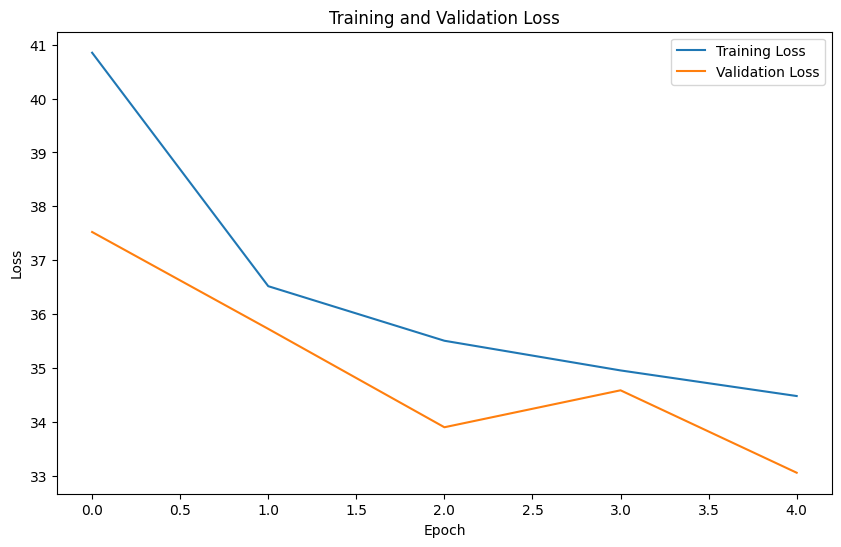

In [212]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

* it has still space for improvment but small...

* As expected, ANN aren't good for this problem. They are memory extensive and not performing near as good as xgboost or RF